### 数字图像处理

图像在计算机里面使用矩阵(数组)来表示,我们可以编程来分析图像的数字特征

### 读取和显示图像

读取JPG图像,使用matplotlib显示图像

numpy.ndarray

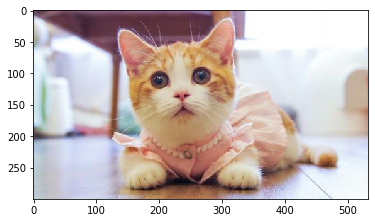

In [1]:
from matplotlib import image as mping
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

img1 = mping.imread('cat.jpg')
plt.imshow(img1)
type(img1)

In [2]:
!pwd

/Users/turing/Desktop/Bible/Image-Digital-Processing


注意:img1对象的类别是多维numpy array

In [3]:
img1.shape

(300, 533, 3)

也可以使用cv2读取图像-cv2

numpy.ndarray

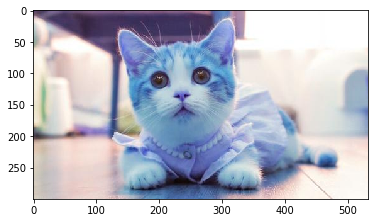

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img2 = cv2.imread('cat.jpg')
plt.imshow(img2)
type(img2)

注意:图像的色彩问题,因为cv2加载图像猴保存为BGR,而非RGB的格式,需要进行变换

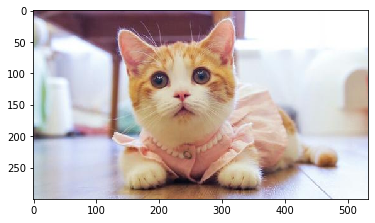

In [5]:
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.imshow(img2)

另外一个PIL库也可以实现

PIL.JpegImagePlugin.JpegImageFile

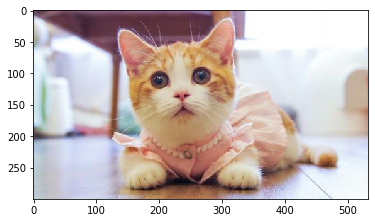

In [6]:
from PIL import Image

img3 = Image.open('cat.jpg')
plt.imshow(img3)
type(img3)

注意此时图像的类型JpegImageFile而非numpy array.这种类型的数据适合PIL库的函数/方法,可以转换层numnpy array

In [7]:
img3 = np.array(img3)
type(img3)

numpy.ndarray

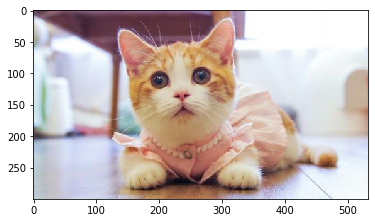

In [8]:
np.save('cat.npy',img3)

img3 = np.load('cat.npy')
plt.imshow(img3)

### 图像大小缩放

大多数机器学习模型需要输入图像是某一特定尺寸

In [9]:
from PIL import Image,ImageOps

orig_img = Image.fromarray(img3)
o_h, o_w = orig_img.size

Original size: 533 x 300
New size: 200 x 200


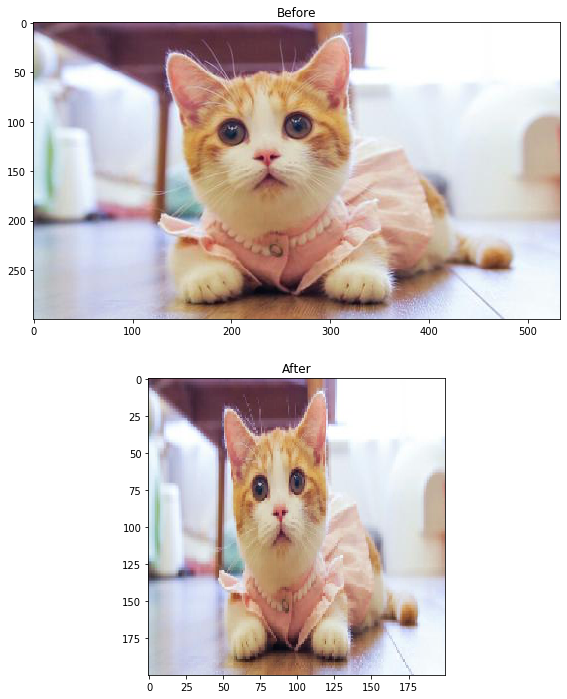

In [10]:
print('Original size:',o_h,'x', o_w)

target_size = (200, 200)
new_img = orig_img.resize(target_size)
n_h, n_w = new_img.size
print('New size:',n_h,'x',n_w)

fig = plt.figure(figsize=(12, 12))

a = fig.add_subplot(2, 1, 1)
imgplot = plt.imshow(orig_img)
a.set_title('Before')

a = fig.add_subplot(2, 1, 2)
imgplot = plt.imshow(new_img)
a.set_title('After')

plt.show()

图像缩放造成了图像改变,可以按照原来图像宽高比缩放图像,避免形变

In [11]:
from PIL import Image,ImageOps

orig_img = Image.open('cat.jpg')

o_h, o_w = orig_img.size
print('Original size:',o_h,'x',o_w)

target_size = (200,200)

scaled_img = orig_img.copy()
scaled_img.thumbnail(target_size, Image.ANTIALIAS)
n_h, n_w = scaled_img.size
print('New size:',n_h,'x',n_w)

Original size: 533 x 300
New size: 200 x 112


(533, 300)
New size: 533 x 300


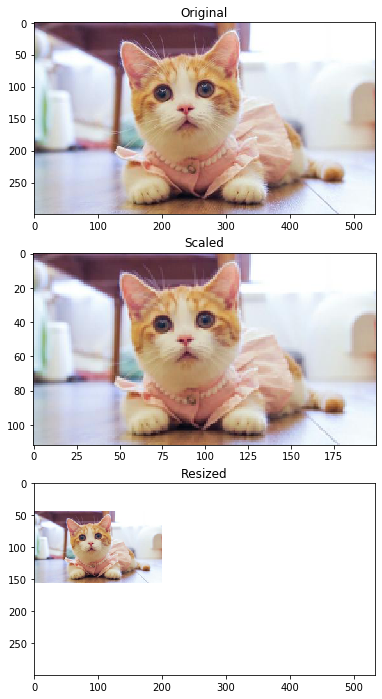

In [12]:
new_img = Image.new("RGB",(o_h,o_w),(255,255,255))

new_img.paste(scaled_img,(int((target_size[0] - scaled_img.size[0]) / 2),int((target_size[1] -scaled_img.size[1])/2)))
print(new_img.size)
n_h, n_w = new_img.size
print('New size:',n_h,'x',n_w)

fig = plt.figure(figsize=(12, 12))

a = fig.add_subplot(3, 1, 1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

a = fig.add_subplot(3, 1, 2)
imgplot = plt.imshow(scaled_img)
a.set_title('Scaled')

a = fig.add_subplot(3, 1, 3)
imgplot = plt.imshow(new_img)
a.set_title('Resized')
plt.show()

### 查看图像的数值特征

图像的类型

In [13]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

img3 = Image.open('cat.darkened.jpeg')
img3 = np.array(img3)
img3.dtype

dtype('uint8')

数组包含8位的整数值,值的范围0-255.RGB色彩通道每一个可能的值

一个比较自然的图像的值的分布应该是均匀分布的,可以通过直方图查看

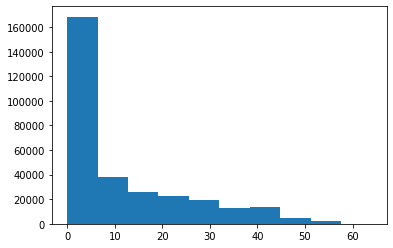

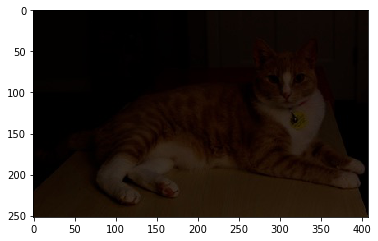

In [14]:
plt.hist(img3.ravel())
plt.show()
plt.imshow(img3)
plt.show()

另外一个方法是看累计积分布函数(CDF)

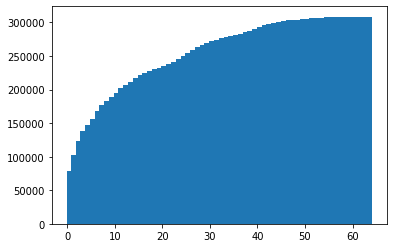

In [15]:
plt.hist(img3.ravel(), bins=255,cumulative=True)
plt.show()

直方图和CDF都预示图像的值分布不均衡

直方图均衡通过调整图像的像素值是的其变为均匀分布

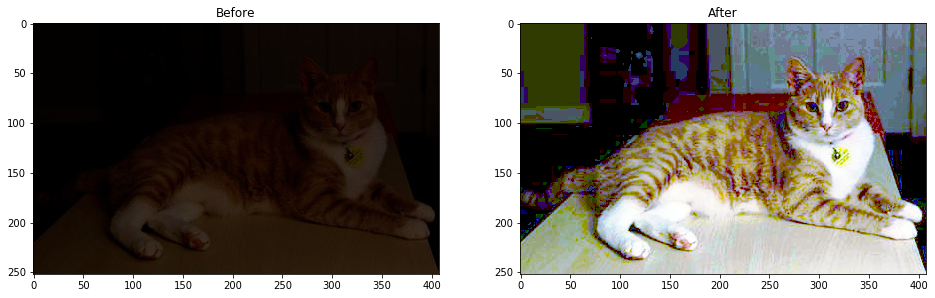

In [16]:
img3_eq = ImageOps.equalize(Image.fromarray(img3))

fig = plt.figure(figsize= (16, 8))

a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img3)
a.set_title('Before')

a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(img3_eq)
a.set_title('After')

plt.show()

现在看看直方图均衡后的图像直方图

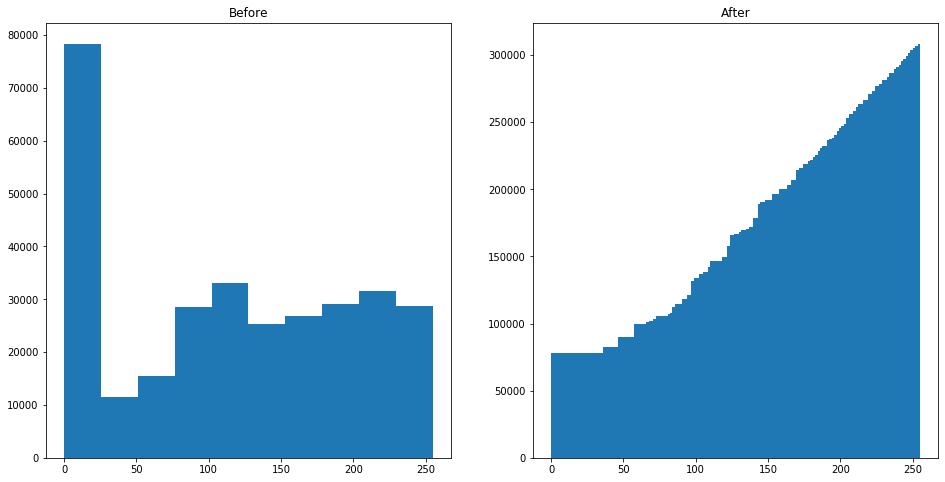

In [17]:
img3_eq = np.array(img3_eq)
fig = plt.figure(figsize= (16, 8))

a = fig.add_subplot(1, 2, 1)
imgplot = plt.hist(img3_eq.ravel())
a.set_title('Before')

a = fig.add_subplot(1, 2, 2)
imgplot = plt.hist(img3_eq.ravel(),bins=155,cumulative=True)
a.set_title('After')

plt.show()

### 使用滤波器去噪声

去除"salt an dpepper"噪声

#### 添加随机噪声
模拟低亮度时拍摄的招牌你,包括大连个随机噪声

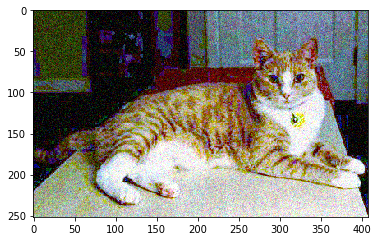

In [18]:
import skimage

img3_n = skimage.util.random_noise(img3_eq)
plt.imshow(img3_n)

#### 高斯滤波器
使用一个像素临近区域的像素的加权平均周代替原来的值

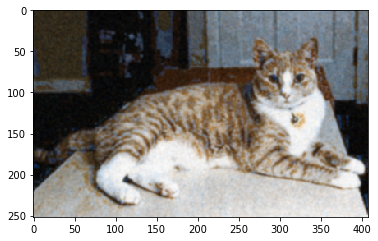

In [19]:
from scipy.ndimage.filters import gaussian_filter as gauss

img3_gauss = gauss(img3_n, sigma= 1)
plt.imshow(img3_gauss)

#### 中值滤波器

使用一个像素临近区域的像素的总监制代替原来的值

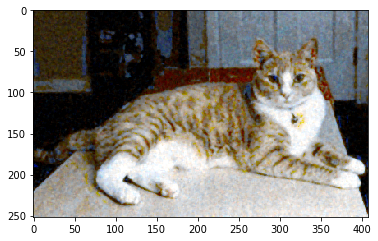

In [20]:
from scipy.ndimage.filters import median_filter as med

img3_med = med(img3_n, size = 3)  # 使用3x3的区域进行取之
plt.imshow(img3_med)

### 特征提取

Sobel边缘检测
寻找图像在纵横方向上面值变化比较大的区域
步骤:
1. 将彩色图像罪案换位会读图像
2. 计算横向和纵向的梯度
3. 计算梯度的大小
4. 规范化梯度值

In [29]:
from scipy import ndimage
import skimage.color as sc
import numpy as np

def edge_sobel(image):
    image = sc.rgb2gray(image)
    dx = ndimage.sobel(image, 1)
    dy = ndimage.sobel(image, 0)
    mag = np.hypot(dx, dy)
    mag *= 255.0 / np.amax(mag)
    mag = mag.astype(np.uint8)
    return mag

img = np.zeros((256, 256))
img[64:-64, 64:-64] = 1
img[96:-96,0:25] = 1

noise = np.random.randn(img.shape[0],img.shape[1])
img += noise

img = ndimage.rotate(img, 15, mode='constant')
img = ndimage.gaussian_filter(img, 8)

sx = ndimage.sobel(img, axis=0, mode ='constant')
sy = ndimage.sobel(img, axis=1, mode ='constant')
sob = np.hypot(sx, sy)

from skimage.feature import canny
canny_edges = canny(img, sigma=5)

打印图像

Text(0.5, 1.0, 'Canny edges')

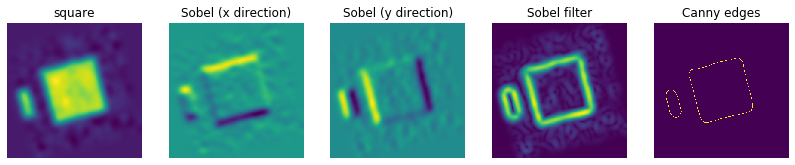

In [30]:
fig = plt.figure(figsize=(14, 14))

ax1 = fig.add_subplot(151)
ax1.imshow(img)
ax1.set_axis_off()
ax1.set_title('square')

ax2 = fig.add_subplot(152)
ax2.imshow(sx)
ax2.set_axis_off()
ax2.set_title('Sobel (x direction)')

ax3= fig.add_subplot(153)
ax3.imshow(sy)
ax3.set_axis_off()
ax3.set_title('Sobel (y direction)')

ax1 = fig.add_subplot(154)
ax1.imshow(sob)
ax1.set_axis_off()
ax1.set_title('Sobel filter')

ax1 = fig.add_subplot(155)
ax1.imshow(canny_edges)
ax1.set_axis_off()
ax1.set_title('Canny edges')

### Harris Corner Detector哈里斯边角侦测

检测在所有方向像素值变化都比较大的区域,这些区域被成为corner,边角

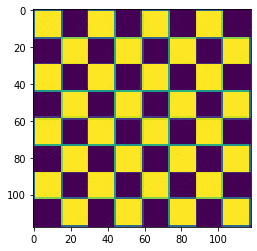

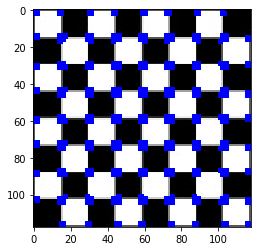

In [32]:
filename = 'chessboard.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
plt.imshow(gray)
plt.show()

dst = cv2.cornerHarris(gray, 2, 3, 0.04)

dst = cv2.dilate(dst, None)

img[dst > 0.01 * dst.max()] = [0, 0, 255]
plt.imshow(img)
plt.show()